# Выпускной проект "Банки — Анализ оттока клиентов"

# Постановка задачи и план действий

**Задача:**

Проанализировать клиентов регионального банка и выделить сегменты клиентов,
которые склонны уходить из банка. Сформулировать и аргументировать рекомендации для отдела маркетинга, помогающие решить данную проблему.

**Шаг 1. Откроем файл с данными и изучим общую информацию**

**Шаг 2. Предобработка данных**
- Изучим, есть ли дубликаты в данных. 
- Изучим, есть ли пропуски. Встречаются ли они, в каких столбцах? Можно ли их обработать или оставить как есть или удалить?
- Исследовать соответствие типов данных в датасете. Привести в соответствие, если нужно.
- Проверить корректность наименований колонок. Переименовать, если нужно.
- Проверим данные на аномалии.

**Шаг 3. Исследовательский анализ данных**
- посмотрим на распределения непрерывных данных в таблице, в т.ч. в разрезе оттока
- посмотрим на распределение категориальных данных в таблице, в т.ч. в разрезе оттока
- сравним портреты типичных клиентов, которые склонны и не склонны уходить из банка
- корреляционный анализ

**Шаг 4. Сформулируем и проверим статистические гипотезы**
- Проверим гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.
- Сформулируем и проверим статистическую гипотезу/гипотизы относительно представленных данных, которая поможет внести ясность в исследование.

**Шаг 5. Промежуточный итог о том, какие показатели стратегически влияют на отток**

**Шаг 6. Сегментировать клиентов**

Сегментируем клиентов по различным признакам. Выделим сементы по размерам и по уровню оттока.

**Шаг 7. Сформулировать общие выводы и рекомендации**

**Шаг 8. Подготовка презентации**

Подготовим презентацию исследования в формате pdf.

## Откроем файл с данными и изучим общую информацию

In [1]:
pip install phik==0.10.0

     |████████████████████████████████| 599 kB 1.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats as st
import numpy as np
import math as mth
import seaborn as sns
import math
import phik

In [3]:
data = pd.read_csv('/datasets/bank_scrooge.csv')
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


## Предобработка данных

### Проверим корректность наименований колонок. Переименуем, если нужно.

In [5]:
data = data.rename(columns={'USERID':'user_id','EST_SALARY':'est_salary'})

In [6]:
list(data)

['user_id',
 'score',
 'city',
 'gender',
 'age',
 'equity',
 'balance',
 'products',
 'credit_card',
 'last_activity',
 'est_salary',
 'churn']

- столбцы переименовали

### Изучим, есть ли дубликаты в данных.

In [7]:
data.duplicated().sum()

0

- полных дубликатов нет

In [8]:
data[['user_id']].duplicated().sum()

73

- 73 дубликаты по полю user_id. 

In [9]:
data[data[['user_id']].duplicated(keep=False)].sort_values('user_id').head(15)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
1411,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
8164,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0


- задвоились клиенты Ярославля и Рыбинска. похоже на технический сбой. В идеале нужно обратить на это внимание сотрудника по базам данных, и попросить присвоить уникальные айди задвоенным клиентам Рыбинса или Ярославля. В нашем случае - такие записи 0.7% - просто можем удалить дубликаты.

In [10]:
data = data.drop_duplicates(subset=['user_id'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9927 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9927 non-null   int64  
 1   score          9927 non-null   float64
 2   city           9927 non-null   object 
 3   gender         9927 non-null   object 
 4   age            9923 non-null   float64
 5   equity         9927 non-null   int64  
 6   balance        7667 non-null   float64
 7   products       9927 non-null   int64  
 8   credit_card    9927 non-null   int64  
 9   last_activity  9927 non-null   int64  
 10  est_salary     9927 non-null   float64
 11  churn          9927 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1008.2+ KB


### Изучим, есть ли пропуски. Встречаются ли они, в каких столбцах? Можно ли их обработать или оставить как есть или удалить?

- осталось 4 пропуска в столбце age, удалим их

In [12]:
data = data.dropna(subset=['age'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9923 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9923 non-null   int64  
 1   score          9923 non-null   float64
 2   city           9923 non-null   object 
 3   gender         9923 non-null   object 
 4   age            9923 non-null   float64
 5   equity         9923 non-null   int64  
 6   balance        7663 non-null   float64
 7   products       9923 non-null   int64  
 8   credit_card    9923 non-null   int64  
 9   last_activity  9923 non-null   int64  
 10  est_salary     9923 non-null   float64
 11  churn          9923 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1007.8+ KB


In [14]:
data[data['balance'].isna()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9976,208085,876.0,Ростов,М,38.0,0,NaN,1,0,0,171763.69,0
9984,125941,729.0,Ярославль,Ж,42.0,0,NaN,1,1,1,687538.70,0
9993,219924,884.0,Рыбинск,Ж,36.0,0,NaN,1,1,1,169844.88,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0


- пропусков в солбце balance - 2260, это 23%, просто отбросить не можем, заполнить какими либо значениями тоже не представляется возможным, оставим пока как есть, но создадим новый столбец со значениями признака, принимающий 1, если в наблюдении пропущено значение, и 0, если в наблюдении значение не пропущено, используем этот столбец в дальнейшей работе

In [15]:
data['balance_nan_true'] = data['balance'].map(lambda x: 1 if math.isnan(x) else 0)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9923 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           9923 non-null   int64  
 1   score             9923 non-null   float64
 2   city              9923 non-null   object 
 3   gender            9923 non-null   object 
 4   age               9923 non-null   float64
 5   equity            9923 non-null   int64  
 6   balance           7663 non-null   float64
 7   products          9923 non-null   int64  
 8   credit_card       9923 non-null   int64  
 9   last_activity     9923 non-null   int64  
 10  est_salary        9923 non-null   float64
 11  churn             9923 non-null   int64  
 12  balance_nan_true  9923 non-null   int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 1.1+ MB


рассмотрим клиентов с пропусками в балансе

In [17]:
data_group13 = data.groupby(['balance_nan_true','churn'],as_index=False).agg({'user_id':'count'})
data_group13['churn'] = data_group13['churn'].map(lambda x : 'отточные клиенты' if x==1 else 'не отточные клиенты')
data_group13['balance_nan_true'] = data_group13['balance_nan_true'].map(lambda x : 'есть пропуск в балансе' if x==1 else 'пропуска нет')
data_group13

,balance_nan_true,churn,user_id
0,пропуска нет,не отточные клиенты,5857
1,пропуска нет,отточные клиенты,1806
2,есть пропуск в балансе,не отточные клиенты,2247
3,есть пропуск в балансе,отточные клиенты,13


In [18]:
data_group14 = data.pivot_table(index='balance_nan_true',values='churn',aggfunc='mean').reset_index()
data_group14['churn'] = data_group14['churn'].map(lambda x : round(x*100,2))
data_group14['balance_nan_true'] = data_group14['balance_nan_true'].map(lambda x : 'есть пропуск в балансе' if x==1 else 'пропуска нет')
data_group14

,balance_nan_true,churn
0,пропуска нет,23.57
1,есть пропуск в балансе,0.58


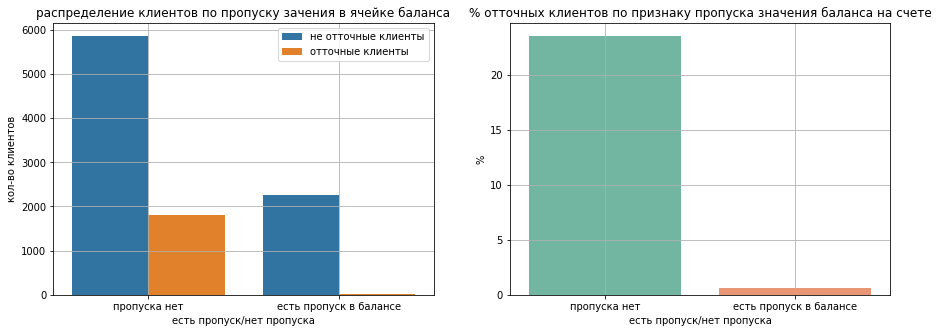

In [19]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='balance_nan_true', y='user_id', data=data_group13, hue='churn')
plt.title('распределение клиентов по пропуску зачения в ячейке баланса')
plt.xlabel('есть пропуск/нет пропуска')
plt.ylabel('кол-во клиентов')
plt.legend(fontsize=10)
plt.grid(True)

plt.subplot(1, 2, 2)
sns.barplot(x='balance_nan_true', y='churn', data=data_group14 , palette= 'Set2')
plt.title('% отточных клиентов по признаку пропуска значения баланса на счете')
plt.xlabel('есть пропуск/нет пропуска')
plt.ylabel('%')
plt.grid(True)

plt.show()

- клиентов с пропуском в значении баланса счета чуть больше чем в три раза меньше чем клиентов без пропуска
- отточности у клиентов с пропуском зачения баланса на счете практически нет (пол процента)

- кол-во таких клиентов велико, разница процентов отточности огромна, проведем доп.анализ таких клиентов
- сгруппирруем данные по этому признаку и посмотрим на ключевые параметры

In [20]:
data.query('balance_nan_true == 1').head(15)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan_true
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,1
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0,1
10,148929,927.0,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0,1
11,172184,921.0,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0,1
19,127034,922.0,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0,1
21,177415,896.0,Рыбинск,Ж,47.0,0,NaN,1,0,0,225060.35,0,1
30,155730,946.0,Ярославль,Ж,47.0,0,NaN,2,1,1,660015.85,0,1
34,205226,944.0,Ярославль,М,35.0,0,NaN,2,1,1,239843.39,0,1
39,173175,924.0,Рыбинск,Ж,51.0,0,NaN,1,1,1,248844.47,0,1
43,228585,956.0,Ростов,М,41.0,0,NaN,1,1,0,115117.10,0,1


In [21]:
print('средний доход категории с пропуском в балансе:',round(data.query('balance_nan_true == 1')['est_salary'].mean()))
print('средний доход категории без пропуска в балансе:',round(data.query('balance_nan_true == 0')['est_salary'].mean()))
print()
print('медианный доход категории с пропуском в балансе:',round(data.query('balance_nan_true == 1')['est_salary'].median()))
print('медианный доход категории без пропуска в балансе:',round(data.query('balance_nan_true == 0')['est_salary'].median()))
print()
print('средний балл скоринга категории с пропуском в балансе:',round(data.query('balance_nan_true == 1')['score'].mean()))
print('средний балл скоринга без пропуска в балансе:',round(data.query('balance_nan_true == 0')['score'].mean()))

средний доход категории с пропуском в балансе: 226701
средний доход категории без пропуска в балансе: 124642

медианный доход категории с пропуском в балансе: 174755
медианный доход категории без пропуска в балансе: 106355

средний балл скоринга категории с пропуском в балансе: 865
средний балл скоринга без пропуска в балансе: 844


In [22]:
data.query('balance_nan_true==1')['equity'].unique()

array([0, 1, 3])

In [23]:
data.query('balance_nan_true==1')['equity'].mean()

0.05176991150442478

In [24]:
data['equity'].mean()

2.634283986697571

- ещё интересная связь, что клиенты с пропусками в балансе счета, почти не владеют собственностью, в сравнении с другими клиентами (0.05 и 2.63 средние баллы собственности)
- возможно это ипотечники, которые просто не могут уйти из банка, поэтому и коэфицент оттока минимален

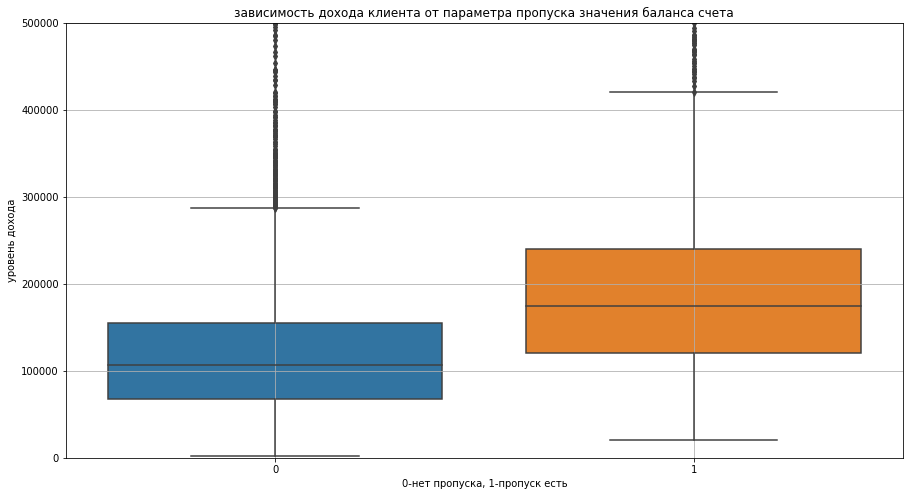

In [25]:
plt.figure(figsize=(15, 8))
plt.ylim(0, 500000)
sns.boxplot(x=data['balance_nan_true'],y=data['est_salary'])
plt.title('зависимость дохода клиента от параметра пропуска значения баланса счета')
plt.xlabel('0-нет пропуска, 1-пропуск есть')
plt.ylabel('уровень дохода')
plt.grid(True)
plt.show()

- уровень дохода клиентов в категории с пропуском значения баланса счета существенно отличается от клиентов без пропуска (в большую сторону, почти вдвое)
- на практике следовало бы уточнить у коллег, что это за клиенты. в данной задаче будем предполагать, что это ипотечники , с высоким доходом, уйти они не могут, поэтому склонности к оттоку нет

### Исследуем соответствие типов данных в датасете. Приведем в соответствие, если нужно.

- преобразуем тип данных в столбцах возраста и очков кредитного скоринга в тип инт

In [26]:
data['score'] = data['score'].astype(int)
data['age'] = data['age'].astype(int)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9923 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           9923 non-null   int64  
 1   score             9923 non-null   int64  
 2   city              9923 non-null   object 
 3   gender            9923 non-null   object 
 4   age               9923 non-null   int64  
 5   equity            9923 non-null   int64  
 6   balance           7663 non-null   float64
 7   products          9923 non-null   int64  
 8   credit_card       9923 non-null   int64  
 9   last_activity     9923 non-null   int64  
 10  est_salary        9923 non-null   float64
 11  churn             9923 non-null   int64  
 12  balance_nan_true  9923 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 1.3+ MB


### Проверим данные на аномалии.

In [28]:
data['products'].unique()

array([2, 3, 1, 4, 5, 0])

In [29]:
data.query('products == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan_true
8957,147837,962,Рыбинск,Ж,79,3,NaN,0,0,0,25063.96,1,1


- все клиенты на данный момент являются действующими, а значит у них есть минимум один продукт, отбросим строки с нулевым кол-вом продуктов

In [30]:
data = data.query('products != 0')

In [31]:
data['gender'].unique()

array(['Ж', 'М'], dtype=object)

In [32]:
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [33]:
data['churn'].unique()

array([1, 0])

In [34]:
data['equity'].unique()

array([1, 5, 0, 4, 3, 2, 6, 7, 8, 9])

In [35]:
data['credit_card'].unique()

array([0, 1])

In [36]:
data['last_activity'].unique()

array([1, 0])

In [37]:
data['score'].describe()

count    9922.000000
mean      848.720923
std        65.393520
min       642.000000
25%       802.000000
50%       853.000000
75%       900.000000
max      1000.000000
Name: score, dtype: float64

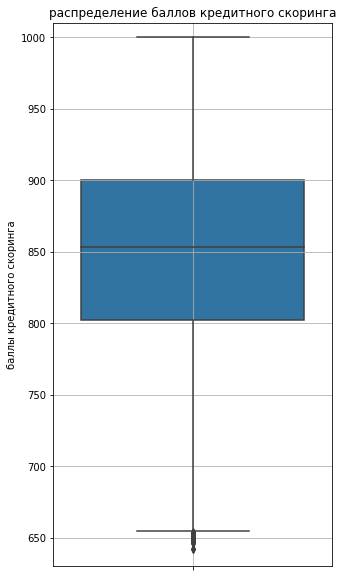

In [38]:
plt.figure(figsize=(5, 10))
sns.boxplot(y=data['score'])
plt.ylim(630, 1010)
plt.title('распределение баллов кредитного скоринга')
plt.ylabel('баллы кредитного скоринга')
plt.grid(True)
plt.show()

In [39]:
len(data.query('score < 654'))

32

- выбросы: клиенты с баллами кредитного скоринга ниже 654, число таких 32

In [40]:
data['age'].describe()

count    9922.000000
mean       42.725559
std        12.172175
min        18.000000
25%        33.000000
50%        40.000000
75%        51.000000
max        86.000000
Name: age, dtype: float64

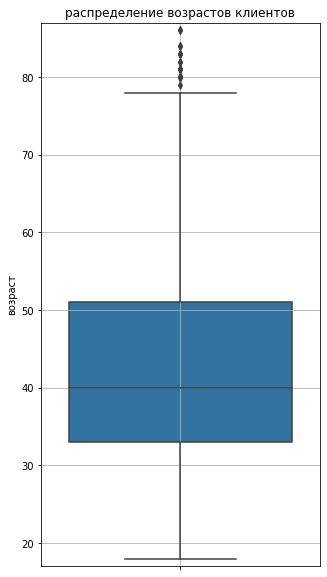

In [41]:
plt.figure(figsize=(5, 10))
sns.boxplot(y=data['age'])
plt.ylim(17, 87)
plt.title('распределение возрастов клиентов')
plt.ylabel('возраст')
plt.grid(True)
plt.show()

In [42]:
len(data.query('age > 78'))

21

- выбросы: клиенты старше 78, число таких 21

In [43]:
data['balance'].describe()

count    7.663000e+03
mean     8.282482e+05
std      1.984248e+06
min      0.000000e+00
25%      2.954990e+05
50%      5.249612e+05
75%      9.808015e+05
max      1.191136e+08
Name: balance, dtype: float64

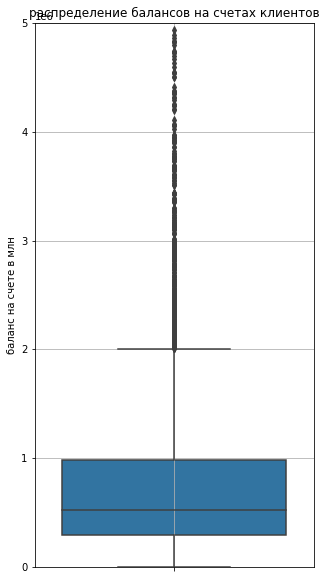

In [44]:
plt.figure(figsize=(5, 10))
sns.boxplot(y=data['balance'])
plt.ylim(-10, 5000000)
plt.title('распределение балансов на счетах клиентов')
plt.ylabel('баланс на счете в млн')
plt.grid(True)
plt.show()

In [45]:
len(data.query('balance > 2100000'))

391

- выбросы: клиенты с балансом более 2100000, число таких 391

In [46]:
data['est_salary'].describe()

count    9.922000e+03
mean     1.478989e+05
std      1.393655e+05
min      2.546300e+03
25%      7.525404e+04
50%      1.197354e+05
75%      1.746796e+05
max      1.395064e+06
Name: est_salary, dtype: float64

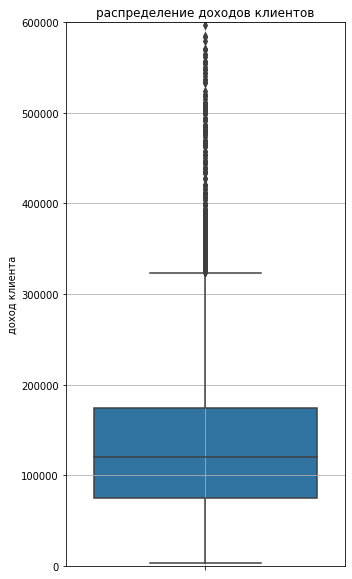

In [47]:
plt.figure(figsize=(5, 10))
sns.boxplot(y=data['est_salary'])
plt.ylim(-10, 600000)
plt.title('распределение доходов клиентов')
plt.ylabel('доход клиента')
plt.grid(True)
plt.show()

In [48]:
len(data.query('est_salary > 330000'))

456

- выбросы: клиенты с доходом более 330000, число таких 456

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9922 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           9922 non-null   int64  
 1   score             9922 non-null   int64  
 2   city              9922 non-null   object 
 3   gender            9922 non-null   object 
 4   age               9922 non-null   int64  
 5   equity            9922 non-null   int64  
 6   balance           7663 non-null   float64
 7   products          9922 non-null   int64  
 8   credit_card       9922 non-null   int64  
 9   last_activity     9922 non-null   int64  
 10  est_salary        9922 non-null   float64
 11  churn             9922 non-null   int64  
 12  balance_nan_true  9922 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 1.1+ MB


<div style="border:solid orange 2px; padding: 20px">
    
**Предобработка данных выполнена. Отброшены дубликаты, отброшены пропуски там где возможно, скорректированы названия столбцов, приведены в соответствие типы данных, найдены и удалены аномалии. Определены параметы значений по столбцам, выбросы и наборы уникальных значений.**

In [50]:
data['gender2'] = data['gender']
data['city2'] = data['city']
data = pd.get_dummies(data,columns=['gender2','city2'],drop_first= False)
data = data.rename(columns={'gender2_М':'man','gender2_Ж':'women','city2_Ростов':'rostov','city2_Рыбинск':'ribinsk','city2_Ярославль':'yaroslavl'})

In [51]:
data

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan_true,women,man,rostov,ribinsk,yaroslavl
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,1,0,0,1,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1,0,0,1,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,1,1,0,0,1,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,1,0,0,0,1
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0,0,0,1,0,1,0
9996,139170,894,Ярославль,М,46,0,NaN,1,1,0,196898.29,0,1,0,1,0,0,1
9997,115639,903,Ярославль,М,24,0,NaN,2,1,1,108905.09,0,1,0,1,0,0,1
9998,148700,777,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0,0,1,0,0,0,1


## Исследовательский анализ данных

### посмотрим на распределение категориальных данных в таблице, в т.ч. в разрезе оттока

#### city

In [52]:
data_group1 = data.groupby(['city','churn'],as_index=False).agg({'user_id':'count'})
data_group1['churn'] = data_group1['churn'].map(lambda x : 'отточные клиенты' if x==1 else 'не отточные клиенты')
data_group1

,city,churn,user_id
0,Ростов,не отточные клиенты,1151
1,Ростов,отточные клиенты,265
2,Рыбинск,не отточные клиенты,2216
3,Рыбинск,отточные клиенты,436
4,Ярославль,не отточные клиенты,4737
5,Ярославль,отточные клиенты,1117


In [53]:
data_group2 = data.pivot_table(index='city',values='churn',aggfunc='mean').reset_index()
data_group2['churn'] = data_group2['churn'].map(lambda x : round(x*100,2))
data_group2

,city,churn
0,Ростов,18.71
1,Рыбинск,16.44
2,Ярославль,19.08


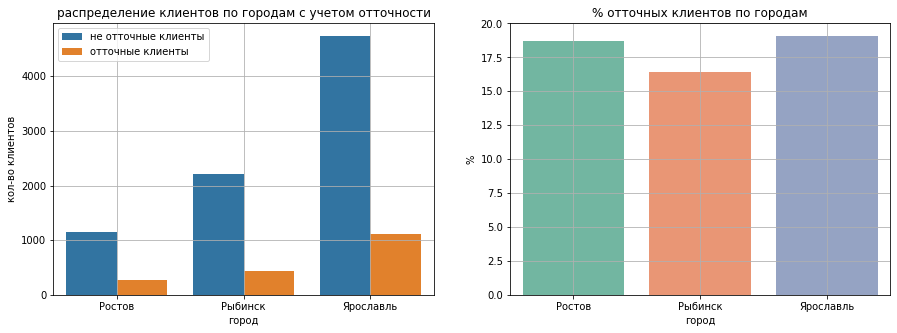

In [54]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='city', y='user_id', data=data_group1, hue='churn')
plt.title('распределение клиентов по городам с учетом отточности')
plt.xlabel('город')
plt.ylabel('кол-во клиентов')
plt.legend(fontsize=10)
plt.grid(True)

plt.subplot(1, 2, 2)
sns.barplot(x='city', y='churn', data=data_group2 , palette= 'Set2')
plt.title('% отточных клиентов по городам')
plt.xlabel('город')
plt.ylabel('%')
plt.grid(True)

plt.show()

- в Ярославле клиентов больше всего, в Ростове - меньше. процент отточности по городам примерно одинаков, и находится в промежутке 16-19%
- анализируя полученные графики и сводные талицы, можем сделать предварительный вывод, что доля отточности практически не зависит от параметра "город"

#### gender

In [55]:
data_group3 = data.groupby(['gender','churn'],as_index=False).agg({'user_id':'count'})
data_group3['churn'] = data_group3['churn'].map(lambda x : 'отточные клиенты' if x==1 else 'не отточные клиенты')
data_group3

,gender,churn,user_id
0,Ж,не отточные клиенты,4317
1,Ж,отточные клиенты,635
2,М,не отточные клиенты,3787
3,М,отточные клиенты,1183


In [56]:
data_group4 = data.pivot_table(index='gender',values='churn',aggfunc='mean').reset_index()
data_group4['churn'] = data_group4['churn'].map(lambda x : round(x*100,2))
data_group4

,gender,churn
0,Ж,12.82
1,М,23.80


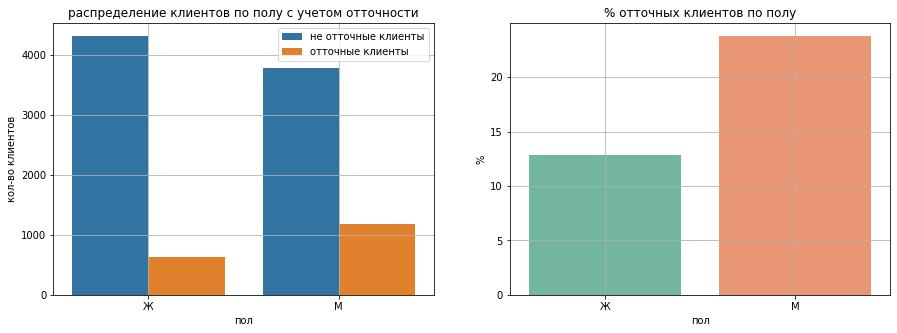

In [57]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='gender', y='user_id', data=data_group3, hue='churn')
plt.title('распределение клиентов по полу с учетом отточности')
plt.xlabel('пол')
plt.ylabel('кол-во клиентов')
plt.legend(fontsize=10)
plt.grid(True)

plt.subplot(1, 2, 2)
sns.barplot(x='gender', y='churn', data=data_group4 , palette= 'Set2')
plt.title('% отточных клиентов по полу')
plt.xlabel('пол')
plt.ylabel('%')
plt.grid(True)

plt.show()

- клиентов женщин и мужчин в банке практически одинаково
- процент отточности у мужчин почти в два раза выше чем у женщин (24% против 13%)
- можем предположить, что у мужчин склонность к оттоку выше

#### equity

In [58]:
data_group5 = data.groupby(['equity','churn'],as_index=False).agg({'user_id':'count'})
data_group5['churn'] = data_group5['churn'].map(lambda x : 'отточные клиенты' if x==1 else 'не отточные клиенты')
data_group5

,equity,churn,user_id
0,0,не отточные клиенты,2464
1,0,отточные клиенты,90
2,1,не отточные клиенты,678
3,1,отточные клиенты,93
4,2,не отточные клиенты,880
5,2,отточные клиенты,166
6,3,не отточные клиенты,1210
7,3,отточные клиенты,321
8,4,не отточные клиенты,1377
9,4,отточные клиенты,464


In [59]:
data_group6 = data.pivot_table(index='equity',values='churn',aggfunc='mean').reset_index()
data_group6['churn'] = data_group6['churn'].map(lambda x : round(x*100,2))
data_group6

,equity,churn
0,0,3.52
1,1,12.06
2,2,15.87
3,3,20.97
4,4,25.20
5,5,30.17
6,6,36.02
7,7,46.84
8,8,35.29
9,9,53.85


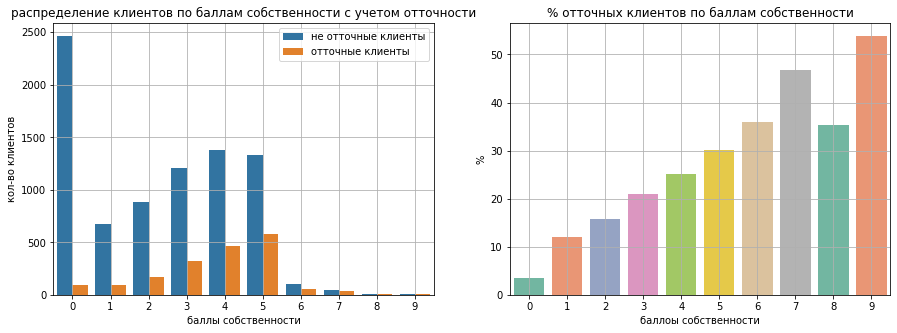

In [60]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='equity', y='user_id', data=data_group5, hue='churn')
plt.title('распределение клиентов по баллам собственности с учетом отточности')
plt.xlabel('баллы собственности')
plt.ylabel('кол-во клиентов')
plt.legend(fontsize=10)
plt.grid(True)

plt.subplot(1, 2, 2)
sns.barplot(x='equity', y='churn', data=data_group6 , palette= 'Set2')
plt.title('% отточных клиентов по баллам собственности')
plt.xlabel('баллоы собственности')
plt.ylabel('%')
plt.grid(True)

plt.show()

- больше всего клиентов с нулевым баллом собственности (без собственности)
- кол-во клиентов с баллами собственности 7-9 ничтожно мало, можем их во внимание не брать
- анализируя полученные графики и сводные талицы, можем сделать предварительный вывод, что с увеличением баллов собственности растет и отточность

#### products

In [61]:
data_group7 = data.groupby(['products','churn'],as_index=False).agg({'user_id':'count'})
data_group7['churn'] = data_group7['churn'].map(lambda x : 'отточные клиенты' if x==1 else 'не отточные клиенты')
data_group7

,products,churn,user_id
0,1,не отточные клиенты,3071
1,1,отточные клиенты,235
2,2,не отточные клиенты,4117
3,2,отточные клиенты,978
4,3,не отточные клиенты,731
5,3,отточные клиенты,297
6,4,не отточные клиенты,174
7,4,отточные клиенты,300
8,5,не отточные клиенты,11
9,5,отточные клиенты,8


In [62]:
data_group8 = data.pivot_table(index='products',values='churn',aggfunc='mean').reset_index()
data_group8['churn'] = data_group8['churn'].map(lambda x : round(x*100,2))
data_group8

,products,churn
0,1,7.11
1,2,19.20
2,3,28.89
3,4,63.29
4,5,42.11


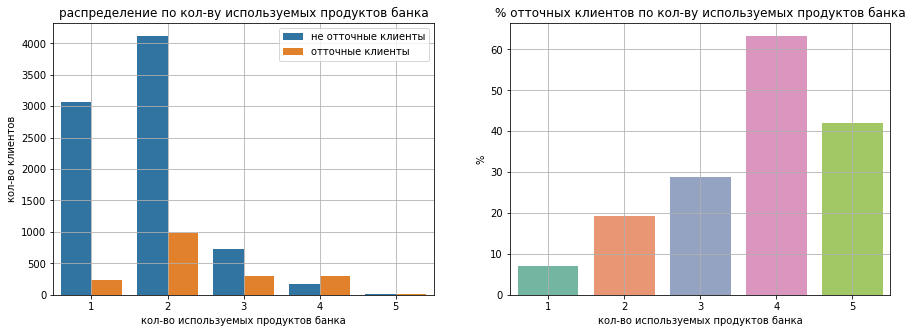

In [63]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='products', y='user_id', data=data_group7, hue='churn')
plt.title('распределение по кол-ву используемых продуктов банка')
plt.xlabel('кол-во используемых продуктов банка')
plt.ylabel('кол-во клиентов')
plt.legend(fontsize=10)
plt.grid(True)

plt.subplot(1, 2, 2)
sns.barplot(x='products', y='churn', data=data_group8 , palette= 'Set2')
plt.title('% отточных клиентов по кол-ву используемых продуктов банка')
plt.xlabel('кол-во используемых продуктов банка')
plt.ylabel('%')
plt.grid(True)

plt.show()

- преобладающее большинство клиентов используют 1-2 продукта банка (большинство - 2 продукта)
- заметна зависимость, чем больше кол-во используемых продуктов, тем выше отточность
- среди клиентов, испльзующих 4 продукта, доля отточных превышает долю не отточных
- число клиентов, использующих 5 продуктов, ничтожно мало, во внимание можно не брать

#### credit_card

In [64]:
data_group9 = data.groupby(['credit_card','churn'],as_index=False).agg({'user_id':'count'})
data_group9['churn'] = data_group9['churn'].map(lambda x : 'отточные клиенты' if x==1 else 'не отточные клиенты')
data_group9['credit_card'] = data_group9['credit_card'].map(lambda x : 'есть кредитная карта' if x==1 else 'нет кредитной карты')
data_group9

,credit_card,churn,user_id
0,нет кредитной карты,не отточные клиенты,2359
1,нет кредитной карты,отточные клиенты,815
2,есть кредитная карта,не отточные клиенты,5745
3,есть кредитная карта,отточные клиенты,1003


In [65]:
data_group10 = data.pivot_table(index='credit_card',values='churn',aggfunc='mean').reset_index()
data_group10['churn'] = data_group10['churn'].map(lambda x : round(x*100,2))
data_group10['credit_card'] = data_group10['credit_card'].map(lambda x : 'есть кредитная карта' if x==1 else 'нет кредитной карты')
data_group10

,credit_card,churn
0,нет кредитной карты,25.68
1,есть кредитная карта,14.86


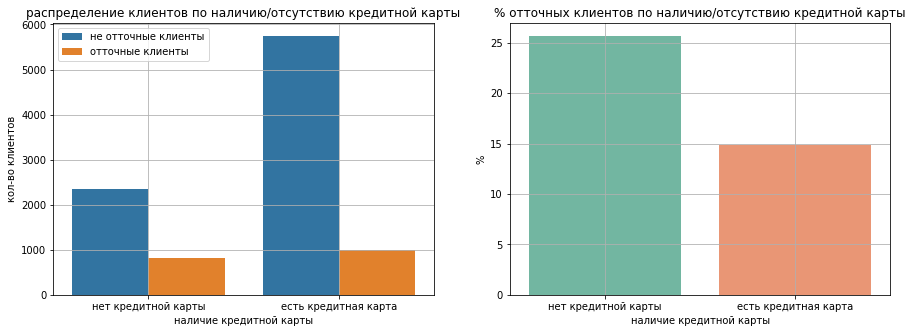

In [66]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='credit_card', y='user_id', data=data_group9, hue='churn')
plt.title('распределение клиентов по наличию/отсутствию кредитной карты')
plt.xlabel('наличие кредитной карты')
plt.ylabel('кол-во клиентов')
plt.legend(fontsize=10)
plt.grid(True)

plt.subplot(1, 2, 2)
sns.barplot(x='credit_card', y='churn', data=data_group10 , palette= 'Set2')
plt.title('% отточных клиентов по наличию/отсутствию кредитной карты')
plt.xlabel('наличие кредитной карты')
plt.ylabel('%')
plt.grid(True)

plt.show()

- кредитная карта есть у большинства клиентов банка 
- клиенты, не имеющие кредитной карты, более подвержены отточности, процент отточности почти вдвое выше чем у клиентов, имеющих кредитную карту (26% и 15%)

#### last_activity

In [67]:
data_group11 = data.groupby(['last_activity','churn'],as_index=False).agg({'user_id':'count'})
data_group11['churn'] = data_group11['churn'].map(lambda x : 'отточные клиенты' if x==1 else 'не отточные клиенты')
data_group11['last_activity'] = data_group11['last_activity'].map(lambda x : 'активный клиент' if x==1 else 'не активный клиент')
data_group11

,last_activity,churn,user_id
0,не активный клиент,не отточные клиенты,4188
1,не активный клиент,отточные клиенты,541
2,активный клиент,не отточные клиенты,3916
3,активный клиент,отточные клиенты,1277


In [68]:
data_group12 = data.pivot_table(index='last_activity',values='churn',aggfunc='mean').reset_index()
data_group12['churn'] = data_group12['churn'].map(lambda x : round(x*100,2))
data_group12['last_activity'] = data_group12['last_activity'].map(lambda x : 'активный клиент' if x==1 else 'не активный клиент')
data_group12

,last_activity,churn
0,не активный клиент,11.44
1,активный клиент,24.59


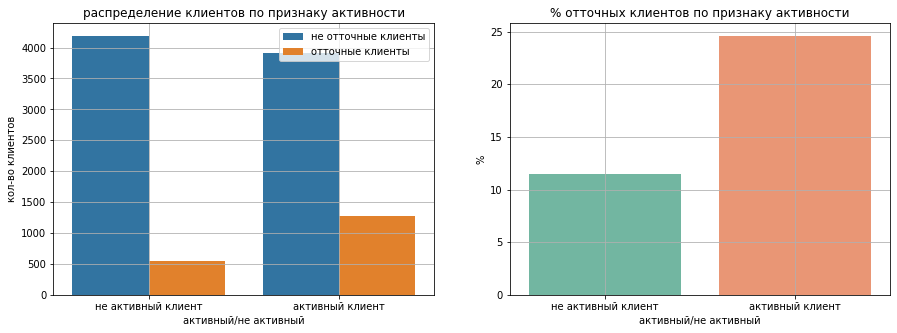

In [69]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='last_activity', y='user_id', data=data_group11, hue='churn')
plt.title('распределение клиентов по признаку активности')
plt.xlabel('активный/не активный')
plt.ylabel('кол-во клиентов')
plt.legend(fontsize=10)
plt.grid(True)

plt.subplot(1, 2, 2)
sns.barplot(x='last_activity', y='churn', data=data_group12 , palette= 'Set2')
plt.title('% отточных клиентов по признаку активности')
plt.xlabel('активный/не активный')
plt.ylabel('%')
plt.grid(True)

plt.show()

- активных и не активных клиентов практически одинаково
- процент отточности активных клиентов более чем в два раза выше, чем не активных (25% и 11%)

#### balance_nan_true
рассмотрим клиентов с пропусками в балансе

In [70]:
#data_group13 = data.groupby(['balance_nan_true','churn'],as_index=False).agg({'user_id':'count'})
#data_group13['churn'] = data_group13['churn'].map(lambda x : 'отточные клиенты' if x==1 else 'не отточные клиенты')
#data_group13['balance_nan_true'] = data_group13['balance_nan_true'].map(lambda x : 'есть пропуск в балансе' if x==1 else 'пропуска нет')
data_group13

,balance_nan_true,churn,user_id
0,пропуска нет,не отточные клиенты,5857
1,пропуска нет,отточные клиенты,1806
2,есть пропуск в балансе,не отточные клиенты,2247
3,есть пропуск в балансе,отточные клиенты,13


In [71]:
#data_group14 = data.pivot_table(index='balance_nan_true',values='churn',aggfunc='mean').reset_index()
#data_group14['churn'] = data_group14['churn'].map(lambda x : round(x*100,2))
#data_group14['balance_nan_true'] = data_group14['balance_nan_true'].map(lambda x : 'есть пропуск в балансе' if x==1 else 'пропуска нет')
data_group14

,balance_nan_true,churn
0,пропуска нет,23.57
1,есть пропуск в балансе,0.58


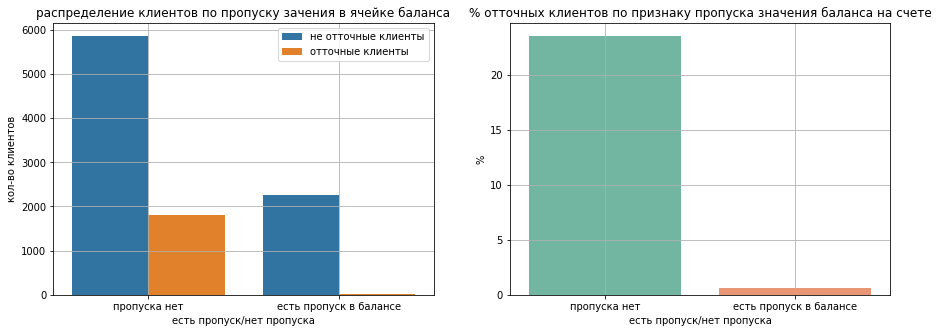

In [72]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='balance_nan_true', y='user_id', data=data_group13, hue='churn')
plt.title('распределение клиентов по пропуску зачения в ячейке баланса')
plt.xlabel('есть пропуск/нет пропуска')
plt.ylabel('кол-во клиентов')
plt.legend(fontsize=10)
plt.grid(True)

plt.subplot(1, 2, 2)
sns.barplot(x='balance_nan_true', y='churn', data=data_group14 , palette= 'Set2')
plt.title('% отточных клиентов по признаку пропуска значения баланса на счете')
plt.xlabel('есть пропуск/нет пропуска')
plt.ylabel('%')
plt.grid(True)

plt.show()

- клиентов с пропуском в значении баланса счета чуть больше чем в три раза меньше чем клиентов без пропуска
- отточности у клиентов с пропуском зачения баланса на счете практически нет (пол процента)

- кол-во таких клиентов велико, разница процентов отточности огромна, проведем доп.анализ таких клиентов
- сгруппирруем данные по этому признаку и посмотрим на ключевые параметры

In [73]:
data.query('balance_nan_true == 1').head(15)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan_true,women,man,rostov,ribinsk,yaroslavl
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,1,1,0,0,1,0
9,133130,906,Ярославль,Ж,67,0,NaN,1,0,1,238055.53,0,1,1,0,0,0,1
10,148929,927,Ростов,М,52,0,NaN,1,1,1,196820.07,0,1,0,1,1,0,0
11,172184,921,Ростов,М,41,0,NaN,1,1,1,217469.48,0,1,0,1,1,0,0
19,127034,922,Рыбинск,Ж,53,0,NaN,1,0,0,147094.82,0,1,1,0,0,1,0
21,177415,896,Рыбинск,Ж,47,0,NaN,1,0,0,225060.35,0,1,1,0,0,1,0
30,155730,946,Ярославль,Ж,47,0,NaN,2,1,1,660015.85,0,1,1,0,0,0,1
34,205226,944,Ярославль,М,35,0,NaN,2,1,1,239843.39,0,1,0,1,0,0,1
39,173175,924,Рыбинск,Ж,51,0,NaN,1,1,1,248844.47,0,1,1,0,0,1,0
43,228585,956,Ростов,М,41,0,NaN,1,1,0,115117.10,0,1,0,1,1,0,0


In [74]:
print('средний доход категории с пропуском в балансе:',round(data.query('balance_nan_true == 1')['est_salary'].mean()))
print('средний доход категории без пропуска в балансе:',round(data.query('balance_nan_true == 0')['est_salary'].mean()))
print()
print('медианный доход категории с пропуском в балансе:',round(data.query('balance_nan_true == 1')['est_salary'].median()))
print('медианный доход категории без пропуска в балансе:',round(data.query('balance_nan_true == 0')['est_salary'].median()))
print()
print('средний балл скоринга категории с пропуском в балансе:',round(data.query('balance_nan_true == 1')['score'].mean()))
print('средний балл скоринга без пропуска в балансе:',round(data.query('balance_nan_true == 0')['score'].mean()))

средний доход категории с пропуском в балансе: 226790
средний доход категории без пропуска в балансе: 124642

медианный доход категории с пропуском в балансе: 174767
медианный доход категории без пропуска в балансе: 106355

средний балл скоринга категории с пропуском в балансе: 865
средний балл скоринга без пропуска в балансе: 844


In [75]:
data.query('balance_nan_true==1')['equity'].unique()

array([0, 1])

In [76]:
data.query('balance_nan_true==1')['equity'].mean()

0.05046480743691899

In [77]:
data['equity'].mean()

2.634247127595243

- ещё интересная связь, что клиенты с пропусками в балансе счета, почти не владеют собственностью, в сравнении с другими клиентами (0.05 и 2.63 средние баллы собственности)
- возможно это ипотечники, которые просто не могут уйти из банка, поэтому и коэфицент оттока минимален

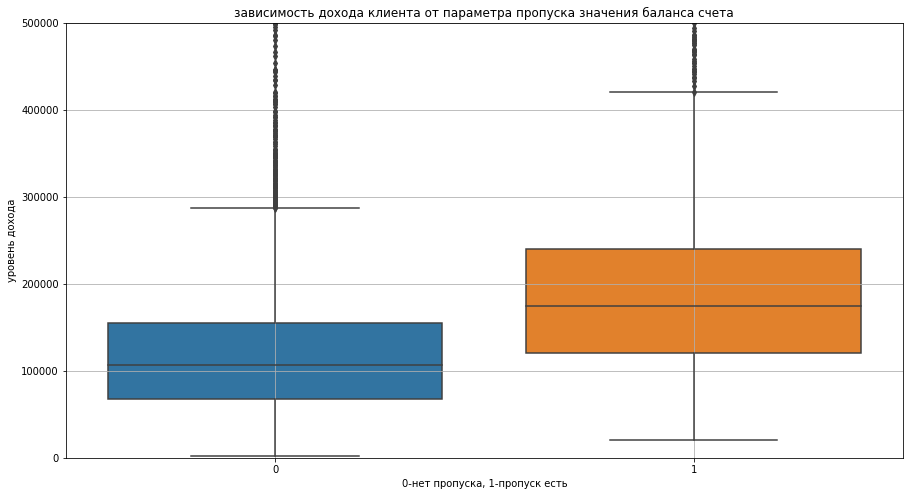

In [78]:
plt.figure(figsize=(15, 8))
plt.ylim(0, 500000)
sns.boxplot(x=data['balance_nan_true'],y=data['est_salary'])
plt.title('зависимость дохода клиента от параметра пропуска значения баланса счета')
plt.xlabel('0-нет пропуска, 1-пропуск есть')
plt.ylabel('уровень дохода')
plt.grid(True)
plt.show()

- уровень дохода клиентов в категории с пропуском значения баланса счета существенно отличается от клиентов без пропуска (в большую сторону, почти вдвое)
- на практике следовало бы уточнить у коллег, что это за клиенты. в данной задаче будем предполагать, что это ипотечники , с высоким доходом, уйти они не могут, поэтому склонности к оттоку нет

<div style="border:solid orange 2px; padding: 20px">
    
**Промежуточные выводы по пункту 3.1:**
    
- город проживания клиента на отточность не влияет
- процент отточности у мужчин почти в два раза выше чем у женщин (24% против 13%)
- с увеличением баллов собственности растет и отточность
- чем больше кол-во используемых продуктов, тем выше отточность
- клиенты, не имеющие кредитной карты, более подвержены отточности, процент отточности почти вдвое выше чем у клиентов, имеющих кредитную карту (26% и 15%)
- процент отточности активных клиентов более чем в два раза выше, чем не активных (25% и 11%)
- отточности у клиентов с пропуском зачения баланса на счете практически нет (пол процента), предположим что это ипотечники , с высоким доходом, уйти они не могут, поэтому склонности к оттоку нет

### посмотрим на распределения непрерывных данных в таблице, в т.ч. в разрезе оттока

#### score

- построим нормализованную гистограмму распределения клиентов по баллам кредитного рейтинга. две гистограммы (отточные и не отточные клиенты) на одном графике. нормализуем каждую гистограмму отдельно, таким образом что площадь каждой гистограммы равна 1.

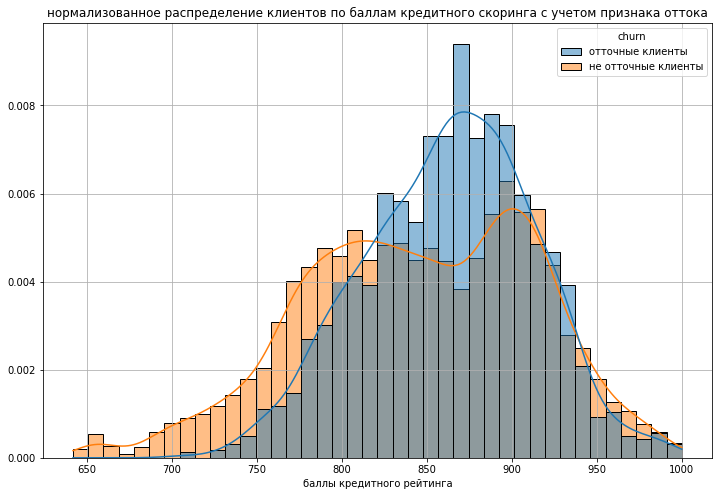

In [79]:
data['churn'] = data['churn'].map(lambda x : 'отточные клиенты' if x==1 else 'не отточные клиенты')

plt.figure(figsize=(12, 8))
sns.histplot(x='score', data=data , hue='churn' , kde=True, stat="density" , common_norm=False)
plt.title('нормализованное распределение клиентов по баллам кредитного скоринга с учетом признака оттока')
plt.xlabel('баллы кредитного рейтинга')
plt.ylabel('')
plt.grid(True)

plt.show()

- можем выделить диапазон с условно высоким оттоком 830-930 баллов, и диапазоны с условно низким оттоком 600-830 и 930-1000

#### age

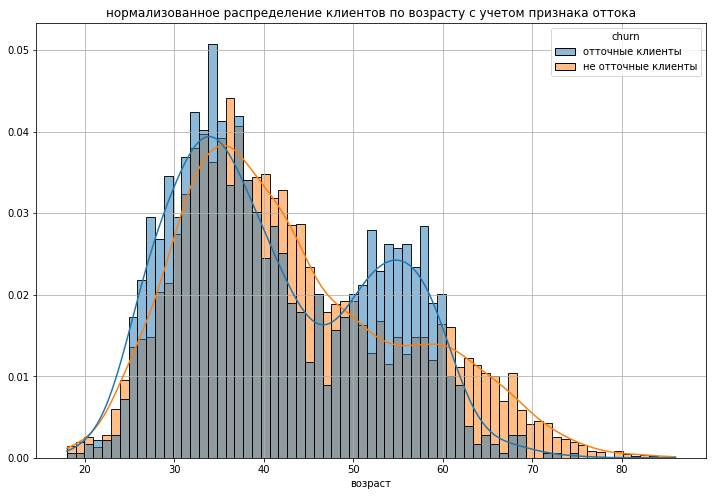

In [80]:
plt.figure(figsize=(12, 8))
sns.histplot(x='age', data=data , hue='churn' , kde=True, stat="density" , common_norm=False , bins=69)
plt.title('нормализованное распределение клиентов по возрасту с учетом признака оттока')
plt.xlabel('возраст')
plt.ylabel('')
plt.grid(True)

plt.show()

- отточные диапазоны:25-35 и 50-60
- не отточные диапазоны:младше 25-ти, 35-50 и старше 60-ти

#### balance

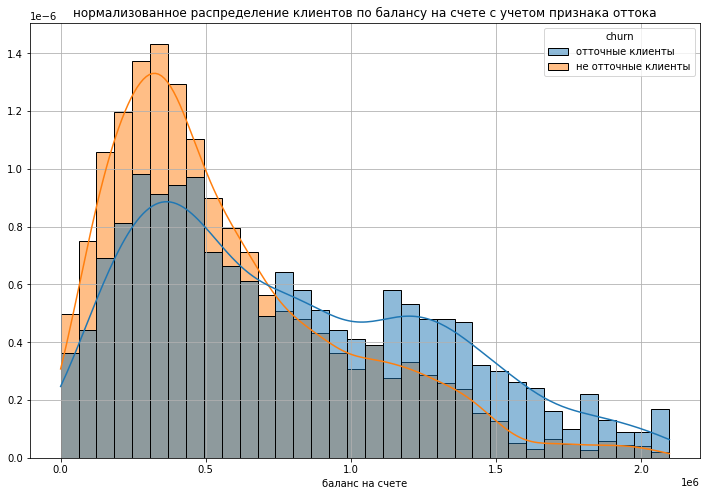

In [81]:
plt.figure(figsize=(12, 8))
sns.histplot(x='balance', data=data.query('balance<2100000') , hue='churn' , kde=True, stat="density" , common_norm=False)
plt.title('нормализованное распределение клиентов по балансу на счете с учетом признака оттока')
plt.xlabel('баланс на счете')
plt.ylabel('')
plt.grid(True)

plt.show()

- условно отточные клиенты с балансом более 750000, с балансом меньше - условно не отточные

#### est_salary

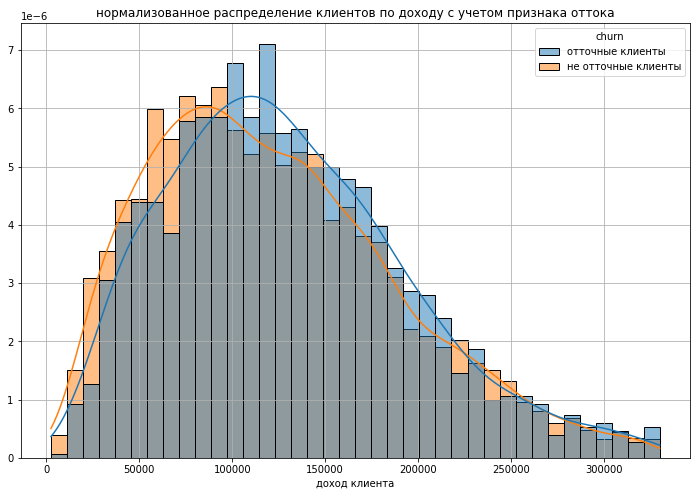

In [82]:
plt.figure(figsize=(12, 8))
sns.histplot(x='est_salary', data=data.query('est_salary<330000') , hue='churn' , kde=True, stat="density" , common_norm=False)
plt.title('нормализованное распределение клиентов по доходу с учетом признака оттока')
plt.xlabel('доход клиента')
plt.ylabel('')
plt.grid(True)

plt.show()

- можем выделить диапазоны по доходу: до 100000 - не отточный, 100000-220000 - отточный

<div style="border:solid orange 2px; padding: 20px">
    
**Промежуточные выводы по пункту 3.2:**
    
Отточные диапазоны:
- по баллам скоринга 830-930 баллов 
- по возрасту 25-35 и 50-60 лет
- по балансу на счете - более 750000
- по доходу 100000-220000

### корреляционный анализ

In [83]:
data_corr=data.phik_matrix(interval_cols=['score','age','balance','est_salary'])

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:55: UserWarning: The number of unique values of variable user_id is very large: 9922. Are you sure this is not an interval variable? Analysis for pairs of variables including user_id might be slow.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/phik/binning.py:101: Warning: numeric variable user_id has 9922 unique values. Are you sure you don't want to bin it?
  warnings.warn(


In [84]:
data_corr


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan_true,women,man,rostov,ribinsk,yaroslavl
user_id,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
score,1.0,1.000000,0.092373,0.070962,0.041780,0.527251,0.170834,0.418554,0.208895,0.053252,0.394876,0.228309,0.753801,0.070962,0.070962,0.086553,0.032374,0.085899
city,1.0,0.092373,1.000000,0.010296,0.093365,0.062847,0.039783,0.127827,0.074873,0.031050,0.170634,0.015617,0.039920,0.010296,0.010296,1.000000,1.000000,1.000000
gender,1.0,0.070962,0.010296,1.000000,0.284790,0.063241,0.045448,0.071571,0.195902,0.013466,0.142669,0.220135,0.097463,1.000000,1.000000,0.017208,0.009740,0.029665
age,1.0,0.041780,0.093365,0.284790,1.000000,0.041671,0.024968,0.141101,0.156942,0.090409,0.358767,0.183066,0.047038,0.284790,0.284790,0.068549,0.058548,0.097510
equity,1.0,0.527251,0.062847,0.063241,0.041671,1.000000,0.000000,0.583801,0.221499,0.050671,0.285533,0.352327,0.975591,0.063241,0.063241,0.063651,0.000000,0.056192
balance,1.0,0.170834,0.039783,0.045448,0.024968,0.000000,1.000000,0.000000,0.000000,0.000000,0.374344,0.024472,NaN,0.045448,0.045448,0.000000,0.022924,0.047892
products,1.0,0.418554,0.127827,0.071571,0.141101,0.583801,0.000000,1.000000,0.272171,0.112425,0.222497,0.260067,0.491475,0.071571,0.071571,0.044656,0.087834,0.110587
credit_card,1.0,0.208895,0.074873,0.195902,0.156942,0.221499,0.000000,0.272171,1.000000,0.050079,0.038127,0.202361,0.244794,0.195902,0.195902,0.152432,0.077442,0.179268
last_activity,1.0,0.053252,0.031050,0.013466,0.090409,0.050671,0.000000,0.112425,0.050079,1.000000,0.044513,0.262713,0.041044,0.013466,0.013466,0.000000,0.076021,0.075894


In [85]:
#data_corr=data_corr.drop('user_id')
#data_corr=data_corr.drop('user_id',axis= 1 )

In [87]:
data_corr

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan_true,women,man,rostov,ribinsk,yaroslavl
user_id,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
score,1.000000,0.092373,0.070962,0.041780,0.527251,0.170834,0.418554,0.208895,0.053252,0.394876,0.228309,0.753801,0.070962,0.070962,0.086553,0.032374,0.085899
city,0.092373,1.000000,0.010296,0.093365,0.062847,0.039783,0.127827,0.074873,0.031050,0.170634,0.015617,0.039920,0.010296,0.010296,1.000000,1.000000,1.000000
gender,0.070962,0.010296,1.000000,0.284790,0.063241,0.045448,0.071571,0.195902,0.013466,0.142669,0.220135,0.097463,1.000000,1.000000,0.017208,0.009740,0.029665
age,0.041780,0.093365,0.284790,1.000000,0.041671,0.024968,0.141101,0.156942,0.090409,0.358767,0.183066,0.047038,0.284790,0.284790,0.068549,0.058548,0.097510
equity,0.527251,0.062847,0.063241,0.041671,1.000000,0.000000,0.583801,0.221499,0.050671,0.285533,0.352327,0.975591,0.063241,0.063241,0.063651,0.000000,0.056192
balance,0.170834,0.039783,0.045448,0.024968,0.000000,1.000000,0.000000,0.000000,0.000000,0.374344,0.024472,NaN,0.045448,0.045448,0.000000,0.022924,0.047892
products,0.418554,0.127827,0.071571,0.141101,0.583801,0.000000,1.000000,0.272171,0.112425,0.222497,0.260067,0.491475,0.071571,0.071571,0.044656,0.087834,0.110587
credit_card,0.208895,0.074873,0.195902,0.156942,0.221499,0.000000,0.272171,1.000000,0.050079,0.038127,0.202361,0.244794,0.195902,0.195902,0.152432,0.077442,0.179268
last_activity,0.053252,0.031050,0.013466,0.090409,0.050671,0.000000,0.112425,0.050079,1.000000,0.044513,0.262713,0.041044,0.013466,0.013466,0.000000,0.076021,0.075894


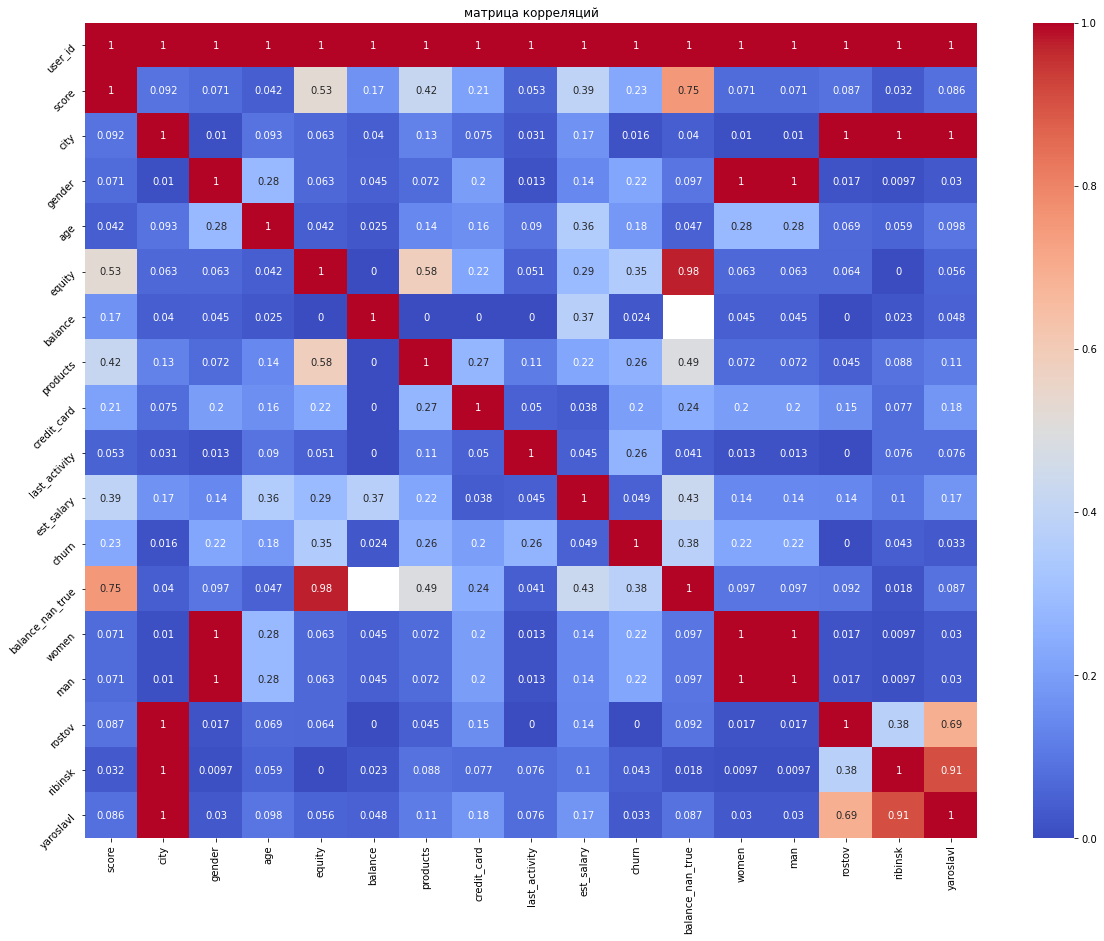

In [88]:
plt.figure(figsize=(20, 15))
plt.title('матрица корреляций')
sns.heatmap(data_corr,cmap='coolwarm',annot= True)
plt.yticks(rotation=45)
plt.show()

- взяв за основу шкалу корреляции Чеддока, можем сказать следущее:
    - связь весьма высокая (0.9-0.99) у:
        - баллы собственности - отсутствие значения в балансе счета (выше предполагали ипотечников на этих позициях) 
    - связь высокая (0.7-0.9) у:
        - баллы скоринга - отсутствие значения в балансе счета (опять же ипотечники, для ипотечного кредита нужно иметь высокие баллы кредитного скоринга)
    - связь заметная (0.5-0.7) у:
        - баллы собственности - баллы скоринга (логично, что чем больше у человека собственности, тем выше кредитный скоринг)
        - кол-во используемых клиентом продуктов - баллы собственности
    - связь умеренная (0.3-0.5) у:
        - products - score
        - est_salary - score
        - est_salary - age
        ***- признак оттока - кол-во баллов собственности***
        - est_salary - balance
        - est_salary - отсутствие значения в балансе счета
        - отсутствие значения в балансе счета - признак оттока (наше предположение об ипотечниках, которые не могут уйти, соответственно признак оттока по ним минимален)
        
**Добавление**

- имеется слабая связь(0.1-0.3) пола (man, woman) с параметром возраст и наличием кредитной карты, и слабая связь с параметром отточности
- по связи параметров городов (rostov, ribinsk, yaroslavl) с другими параметрами, связи не наблюдаем, либо она крайне слабая


### сравним портреты типичных клиентов, которые склонны и не склонны уходить из банка

In [89]:
data_ott = data.query('churn == "отточные клиенты"')
data_notott = data.query('churn == "не отточные клиенты"')

In [90]:
t_c = {'типичный отточный клиент': {'score': data_ott['score'].mean().round(),
                                    'city': data_ott['city'].mode().to_string(index=False) ,
                                    'gender':data_ott['gender'].mode().to_string(index=False) ,
                                    'age':data_ott['age'].mean().round() ,
                                    'equity':data_ott['equity'].median() ,
                                    'balance':data_ott['balance'].mean().round(),
                                    'products':data_ott['products'].median(),
                                    'credit_card':data_ott['credit_card'].mode().to_string(index=False),
                                    'last_activity':data_ott['last_activity'].mode().to_string(index=False),
                                    'est_salary':data_ott['est_salary'].mean().round()},
        'типичный не отточный клиент': {'score': data_notott['score'].mean().round(),
                                    'city': data_notott['city'].mode().to_string(index=False) ,
                                    'gender':data_notott['gender'].mode().to_string(index=False) ,
                                    'age':data_notott['age'].mean().round() ,
                                    'equity':data_notott['equity'].median() ,
                                    'balance':data_notott['balance'].mean().round(),
                                    'products':data_notott['products'].median(),
                                    'credit_card':data_notott['credit_card'].mode().to_string(index=False),
                                    'last_activity':data_notott['last_activity'].mode().to_string(index=False),
                                    'est_salary':data_notott['est_salary'].mean().round()}}
typical_customer=pd.DataFrame(t_c)
typical_customer

,типичный отточный клиент,типичный не отточный клиент
score,863.0,845.0
city,Ярославль,Ярославль
gender,М,Ж
age,41.0,43.0
equity,4.0,3.0
balance,1134458.0,733829.0
products,2.0,2.0
credit_card,1,1
last_activity,1,0
est_salary,148357.0,147796.0


<div style="border:solid orange 2px; padding: 20px">
    
- сравнивая типичных отточных и не отточных клиентов можем заметить явные различия по полу, балансу на счету и активности
    

    
**Дополнение.**

наблюдаем различия типичного отточного и не отточного клиента по следующим признакам:
    
    - незначительное оличие - баллы кредитного скоринга
    - пол
    - незначительное оличие - возраст
    - количество баллов собственности
    - баланс на счёте
    - активный клиент
    

## Сформулируем и проверим статистические гипотезы

### Проверим гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.

- гипотиза H0 - различий дохода между теми клиентами, которые ушли и теми, которые остались нет
- альтернативная гипотиза H1 - различия дохода между теми клиентами, которые ушли и теми, которые остались есть
- уровень статистической значимости установим - 5%

- проверим гипотизу t-критерием Стьюдента

In [91]:
alpha = 0.05

results = st.ttest_ind(data_ott['est_salary'], data_notott['est_salary'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:  0.8766325121997608
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


- проверим гипотизу u-критерием Манна-Уитни

In [92]:
alpha = 0.05

results = st.mannwhitneyu(data_ott['est_salary'], data_notott['est_salary'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:  0.0002061360185759959
Отвергаем нулевую гипотезу: разница статистически значима


- следует доверять u-критерию Манна-Уитни, так как t-критерий Стьюдента применяется в случае, когда выбросов нет или они не существенны. в нашем случае, хоть размер выборки и большой, применить t-тест мы не можем, так как имеется большое кол-во выбросов

**Вывод:**
Отвергаем нулевую гипотизу Н0, есть основания говорить, что различия дохода между теми клиентами, которые ушли и теми, которые остались есть

### Проверим гипотезу различия возрастов клиентов, которые ушли и теми, которые остались. Проверим гипотезу различия кол-ва баллов кредитного скоринга клиентов, которые ушли и теми, которые остались.

- гипотиза H0 - различий в возрастах клиентов, которые ушли и теми, которые остались нет
- альтернативная гипотиза H1 - различия в возрастах клиентов, которые ушли и теми, которые остались есть
- уровень статистической значимости установим - 5%

- кол-во выбросов не велико (всего 21), можем использовать t-критерием Стьюдента

In [93]:
alpha = 0.05

results = st.ttest_ind(data_ott['age'], data_notott['age'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:  5.010125161289605e-07
Отвергаем нулевую гипотезу: разница статистически значима


**Вывод:**
Отвергаем нулевую гипотизу Н0, есть основания говорить, что различия возрастов клиентов, которые ушли и теми, которые остались есть

- гипотиза H0 - различий кол-ва баллов кредитного скоринга клиентов, которые ушли и теми, которые остались нет
- альтернативная гипотиза H1 - различие кол-ва баллов кредитного скоринга клиентов, которые ушли и теми, которые остались есть
- уровень статистической значимости установим - 5%

- кол-во выбросов не велико (всего 32), можем использовать t-критерием Стьюдента

In [94]:
alpha = 0.05

results = st.ttest_ind(data_ott['score'], data_notott['score'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:  3.24643913804823e-26
Отвергаем нулевую гипотезу: разница статистически значима


**Вывод:**
Отвергаем нулевую гипотизу Н0, есть основания говорить, что различия кол-ва баллов кредитного скоринга клиентов, которые ушли и теми, которые остались есть

## Промежуточный итог о том, какие показатели стратегически влияют на отток

### score

- в сравнении портретов мы увидили незначительную разницу 863/845 баллов
- анализ корреляции показал слабую зависимость
- по графикам мы увидели диапазон с высокой отточностью 830-930 баллов
- Итог: будем использовать этот признак в построении сегментов

### city

- в сравнении портретов мы увидили отсутствие разницы по этому параметру
- анализ корреляции показал слабую зависимость
- по графикам мы увидели, что нет зависимости отточности от этого параметра
- Итог: не будем использовать этот признак в построении сегментов

### gender

- в сравнении портретов мы увидили разницу по данному параметру
- анализ корреляции показал слабую зависимость
- по графикам мы увидели, что процент отточности у мужчин почти в два раза выше чем у женщин (24% против 13%)
- Итог: будем использовать этот признак в построении сегментов

### age

- в сравнении портретов мы увидили незначительную разницу 41/43
- анализ корреляции показал слабую зависимость
- по графикам мы увидели диапазоны с повышенной отточностью (25-35 и 50-60)
- Итог: не будем использовать этот признак в построении сегментов

### equity

- в сравнении портретов мы увидили разницу 4/3 баллов
- анализ корреляции показал умеренную зависимость
- по графикам мы увидели, что процент отточности растет по мере увеличения баллов собственности
- Итог: будем использовать этот признак в построении сегментов (есть смысл рассматривать диапазон больше 2-х баллов собственности где уровень отточности более 20%)

### balance

- в сравнении портретов мы увидили существенную разницу 1134458/733829
- анализ корреляции показал крайне слабую зависимость
- по графикам мы увидели, что условно отточные клиенты с балансом более 750000
- Итог: будем использовать этот признак в построении сегментов

### products

- в сравнении портретов мы не увидили разницу
- анализ корреляции показал слабую зависимость
- по графикам мы увидели, что заметна зависимость, чем больше кол-во используемых продуктов, тем выше отточность, но подавляющее большинство использует не более 2-х продуктов, где процент отточности меньше 20%
- Итог: не будем использовать этот признак в построении сегментов

### credit_card

- в сравнении портретов мы не увидили разницу
- анализ корреляции показал слабую зависимость
- по графикам мы увидели, что клиенты, не имеющие кредитной карты, более подвержены отточности, процент отточности почти вдвое выше чем у клиентов, имеющих кредитную карту (26% и 15%)
- Итог: будем использовать этот признак в построении сегментов

### last_activity

- в сравнении портретов мы увидили разницу 1/0
- анализ корреляции показал слабую зависимость
- по графикам мы увидели, что активных и не активных клиентов практически одинаково, процент отточности активных клиентов более чем в два раза выше, чем не активных (25% и 11%)
- Итог: будем использовать этот признак в построении сегментов

### est_salary

- в сравнении портретов мы не увидили разницу 148357/147796
- анализ корреляции показал крайне слабую зависимость
- по графикам мы увидели 100000-220000 - отточный диапазон
- Итог: не будем использовать этот признак в построении сегментов

### balance_nan_true

- анализ корреляции показал умеренную зависимость
- по графикам мы увидели, что клиентов с пропуском в значении баланса счета чуть больше чем в три раза меньше чем клиентов без пропуска, отточности у клиентов с пропуском зачения баланса на счете практически нет (пол процента)
- Итог: будем использовать этот признак в построении сегментов со значением balance_nan_true=0

<div style="border:solid orange 2px; padding: 20px">
    
**Вывод**
    
Для построения сегментов будем использовать следущие параметры:
    
    - score (в диапазоне 830-930)
    - gender (значение М)
    - equity (со значением >2)
    - balance (в диапазоне >750000)
    - credit_card (со значением 0)
    - last_activity (со значением 1)
    - balance_nan_true (со значением 0)


## Сегментция клиентов клиентов. Сегментируем клиентов по различным признакам. Выделим сементы по размерам и по уровню оттока.

In [95]:
data['churn'] = data['churn'].map(lambda x : 1 if x=='отточные клиенты' else 0)
data['churn'].mean()

0.18322918766377747

- средний отток по бану 18%

- выделим сегменты в которых:
    - процент оттока более 36%
    - размер сегментов 300-2000

In [96]:
data.query('equity>2 and last_activity==1 and 930>score>830 and gender=="М"').agg({'churn':['mean','sum','count']})

,churn
mean,0.638814
sum,474.000000
count,742.000000


In [97]:
data.query('last_activity==1 and balance>750000').agg({'churn':['mean','sum','count']})

,churn
mean,0.4862
sum,687.0000
count,1413.0000


In [98]:
data.query('last_activity==1 and 930>score>830 and balance>750000').agg({'churn':['mean','sum','count']})

,churn
mean,0.602299
sum,524.000000
count,870.000000


In [99]:
data.query('last_activity==1 and 930>score>830 and balance>750000 and gender=="М"').agg({'churn':['mean','sum','count']})

,churn
mean,0.726852
sum,314.000000
count,432.000000


In [100]:
data.query('equity>2 and last_activity==1 and 930>score>830 and credit_card==0').agg({'churn':['mean','sum','count']})

,churn
mean,0.59919
sum,444.00000
count,741.00000


In [101]:
data.query('equity>2 and last_activity==1 and 930>score>830').agg({'churn':['mean','sum','count']})

,churn
mean,0.507156
sum,815.000000
count,1607.000000


In [102]:
data.query('balance>750000 and gender=="М" and last_activity==1 and credit_card==0').agg({'churn':['mean','sum','count']})

,churn
mean,0.664537
sum,208.000000
count,313.000000


In [103]:
data.query('balance>750000 and gender=="М" and last_activity==1').agg({'churn':['mean','sum','count']})

,churn
mean,0.6
sum,423.0
count,705.0


- приоритизируем мы сегменты по мере убывания процента оттока и увеличения объема сегмента
- так же во внимание взяли, что отдел маректинга включает только двух работников, у них нет автоматизированных систем, поэтому все мероприятия, рассылки и агитации будут выполнены ручным трудом. Приоритизация идет по мере увеличения кол-ва клиентов в сегменте, если сотрудники будут справлятся с малым сегментом, можно увеличить размер сегмента (к примеру перейти от сегмента 1 к сегменту 3, путем добавления клиентов "Ж", если будут позволять ресурсы)

<div style="border:solid orange 2px; padding: 20px">
    
**Выделим следующие сегменты, по мере уменьшения приоритета:**

1. 432 человека в сегменте, 73% оттока 
    - last_activity==1
    - 930>score>830
    - balance>750000
    - gender=="М"

    
2. 870 человека в сегменте, 60% оттока 
    - last_activity==1
    - 930>score>830
    - balance>750000


3. 1413 человека в сегменте, 49% оттока 
    - last_activity==1
    - balance>750000    

## Сформулируем общие выводы и рекомендации

<div style="border:solid orange 2px; padding: 20px">
    
**Выводы и рекомендации:**
    
Проанализировав клиентов банка и выделив сегменты клиентов, которые склонны уходить из банка, сформулируем следущие рекомендации для отдела маркетинга, помогающие решить проблему:

Следует обратить внимание на клиентов следующих сегментов: 
    
**Сегмент 1:**    
    
    - активный клиент, 
    - мужчина, 
    - с балансом на счете более 750т 
    - с баллами кредитного скоринга 830-930. 
    
Рекомендации: 
    
        Предложить клиентам из этого сегмента какие либо бонусы в обслуживании. Например акцию с увеличением процентов по счету + повышенный кэшбэк за активность + подарок для мужчин к (23 февраля или нов.году. или ещё какому празднику прошедшему или предстоящему) скидку или купон в магазин партнера банка. Данный сегмент имеет отточность 73% при объеме 432 человека (314 человек можно удержать)
    
**Сегмент 2:**    
    
    - активный клиент, 
    - с балансом на счете более 750т 
    - с баллами кредитного скоринга 830-930. 
    
Рекомендации: 
        
        Предложить клиентам из этого сегмента какие либо бонусы в обслуживании. Например акцию с увеличением процентов по счету + повышенный кэшбэк за активность + кредит по сниженному проценту за хороший кредитный рейтинг. Данный сегмент имеет отточность 60% при объеме 870 человека (524 человек можно удержать)
    
**Сегмент 3:**    
    
    - активный клиент, 
    - с балансом на счете более 750т  
    
Рекомендации: 
        
        Предложить клиентам из этого сегмента какие либо бонусы в обслуживании. Например акцию с увеличением процентов по счету + повышенный кэшбэк за активность. Данный сегмент имеет отточность 49% при объеме 1413 человека (687 человек можно удержать)    

## Презентация

Презентация: <https://disk.yandex.ru/i/1JWqH-iFw2P22w>

**Общий вывод:**

    В рамках данной работы, мы проанализировали клиентов регионального банка и выделили сегменты клиентов,которые склонны уходить из банка. Сформулировали и аргументировали рекомендации для отдела маркетинга, помогающие решить данную проблему. Поставленная задача выполнена.

Следует обратить внимание отдела маркетинга на клиентов следующих сегментов:    

**Сегмент 1:**

    - активный клиент, 
    - мужчина, 
    - с балансом на счете более 750т 
    - с баллами кредитного скоринга 830-930. 
    
Рекомендации:    

    Предложить клиентам из этого сегмента какие либо бонусы в обслуживании. Например акцию с увеличением процентов по счету + повышенный кэшбэк за активность + подарок для мужчин к (23 февраля или нов.году. или ещё какому празднику прошедшему или предстоящему) скидку или купон в магазин партнера банка. Данный сегмент имеет отточность 73% при объеме 432 человека (314 человек можно удержать)
    
**Сегмент 2:**    
    
    - активный клиент, 
    - с балансом на счете более 750т 
    - с баллами кредитного скоринга 830-930. 
    
Рекомендации: 
        
        Предложить клиентам из этого сегмента какие либо бонусы в обслуживании. Например акцию с увеличением процентов по счету + повышенный кэшбэк за активность + кредит по сниженному проценту за хороший кредитный рейтинг. Данный сегмент имеет отточность 60% при объеме 870 человека (524 человек можно удержать)

**Сегмент 3:**    
    
    - активный клиент, 
    - с балансом на счете более 750т  
    
Рекомендации: 
        
        Предложить клиентам из этого сегмента какие либо бонусы в обслуживании. Например акцию с увеличением процентов по счету + повышенный кэшбэк за активность. Данный сегмент имеет отточность 49% при объеме 1413 человека (687 человек можно удержать)        